In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

#usar a versão Python 3.12.3

In [2]:
df = pd.read_csv('projeto_puc.csv')
df['data'] = pd.to_datetime(df['data'] , format='%d/%m/%Y')

df.head()

,data,precip,maxima,minima,horas_insol,temp_media,um_relativa,vel_vento
0,1961-01-01,0.0,33.8,22.2,11.7,27.08,67.00,2.333333
1,1961-01-02,0.0,34.7,22.5,9.5,28.06,62.50,1.333333
2,1961-01-03,0.2,27.7,23.1,2.3,24.32,74.25,2.000000
3,1961-01-04,2.4,29.4,20.6,8.7,23.56,57.50,2.333333
4,1961-01-05,0.0,32.5,18.8,10.1,25.22,63.50,3.666667


In [3]:
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18563 entries, 0 to 18562
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         18563 non-null  datetime64[ns]
 1   precip       18563 non-null  float64       
 2   maxima       18563 non-null  float64       
 3   minima       18563 non-null  float64       
 4   horas_insol  18563 non-null  float64       
 5   temp_media   18563 non-null  float64       
 6   um_relativa  18563 non-null  float64       
 7   vel_vento    18563 non-null  float64       
 8   ano          18563 non-null  int32         
 9   mes          18563 non-null  int32         
dtypes: datetime64[ns](1), float64(7), int32(2)
memory usage: 1.3 MB


In [5]:
data_inicio = input("Digite a data inicial (YYYY-MM-DD): ")
data_fim = input("Digite a data final (YYYY-MM-DD): ")

dados_filtrados = df[(df['data'] >= data_inicio) & (df['data'] <= data_fim)]

In [6]:
#CÓDIGO CHAMA O MAIOR VALOR DE PRECIPITAÇÃO DO PERIODO SOLICITADO
precip = (dados_filtrados)['precip'].max()

#CÓDIGO CHAMA O MENOR VALOR DE TEMPERATURA MINIMA DO PERIODO SOLICITADO
temp_min = (dados_filtrados)['minima'].min()

#CÓDIGO CHAMA O VALOR DA MÉDIA DE TEMPERATURA MINIMA DO PERIODO SOLICITADO
temp_media_min = (dados_filtrados)['minima'].mean()

#CÓDIGO CHAMA O MAIOR VALOR DE TEMPERATURA DO PERIODO SOLICITADO
temp_maxima = (dados_filtrados )['maxima'].max()

#CÓDIGO CHAMA O MAIOR VALOR DE UMIDADE DO PERIODO SOLICITADO
umidade = (dados_filtrados )['um_relativa'].max()

#CÓDIGO CHAMA O MAIOR VELOCIDADE DE VENTO DO PERIODO SOLICITADO
velocidade_vento = (dados_filtrados)['vel_vento'].max()

#MAXIMO DE PRECIPITAÇÃO POR MES
mes = (dados_filtrados)['precip'].max()


In [7]:
print("Escolha o tipo de dado que deseja visualizar:")
print("1) Todos os dados")
print("2) Apenas os de precipitação")
print("3) Apenas os de temperatura")
print("4) Apenas os de umidade e vento")
tipo_dado = int(input("Digite o número correspondente ao tipo de dado: "))

if tipo_dado == 1:
    print(dados_filtrados).head(10)
elif tipo_dado == 2:
    print(f"O mês mais chuvoso foi {mes} com {precip} mm de precipitação.")
elif tipo_dado == 3:
    print(f'A temperatura minima foi {temp_min}°C, e a temperatura maxima foi {temp_maxima}°C')
elif tipo_dado == 4:
    print(f'A média de umidade dos período solicitado é{umidade}, e a média da velocidade de vento é {velocidade_vento}')
else:
    print("Tipo de dado inválido.")

Escolha o tipo de dado que deseja visualizar:
1) Todos os dados
2) Apenas os de precipitação
3) Apenas os de temperatura
4) Apenas os de umidade e vento
O mês mais chuvoso foi 78.7 com 78.7 mm de precipitação.


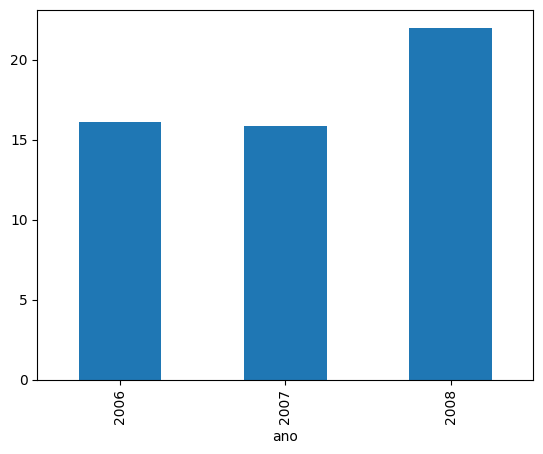

In [8]:
ano = dados_filtrados.groupby('ano')['minima'].mean().plot.bar()

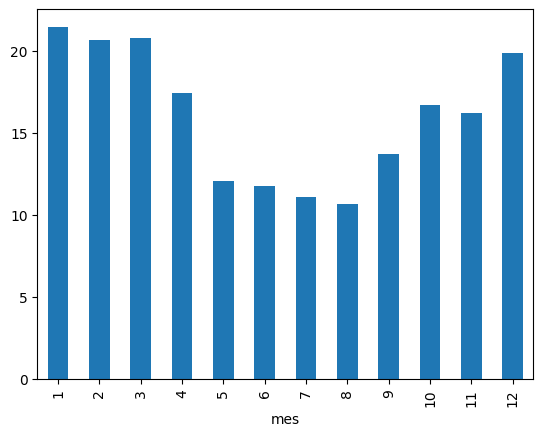

In [9]:
mes = dados_filtrados.groupby('mes')['minima'].mean().plot.bar()